## Import libraries

In [101]:
# generic tools
import numpy as np
import datetime

# tools from sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
%load_ext tensorboard
# delete logs from previous runs - not always safe!
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Download data, train-test split, binarize labels

In [104]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

## Transform multidimensional X-data into 1D


In [105]:
# to data
trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [114]:
length_train_x = len(trainX)
length_test_x = len(testX)
pixel_number = 3072
trainX = trainX.reshape((length_train_x, pixel_number))
testX = testX.reshape((length_test_x, pixel_number))

In [115]:
#convert labels to one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

## Define neural network architecture using ```tf.keras```

In [109]:
# define architecture 1024x256x128x10
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu")) # creating a first layer, taking an inputshape
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax")) # generalisation of logistic regression for multiclass task

## Show summary of model architecture

In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

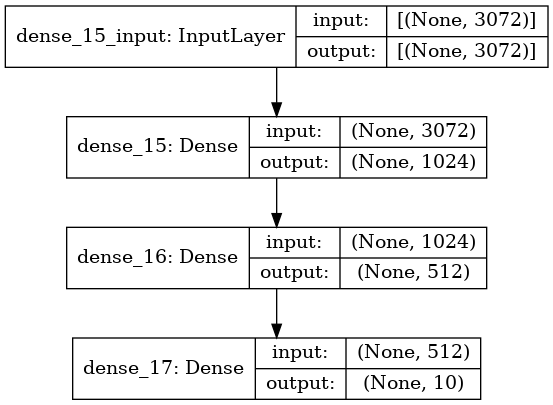

In [111]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compile model loss function, optimizer, and preferred metrics

In [112]:
# train model using SGD
sgd = SGD(0.1)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

## Train model and save history

In [113]:
history = model.fit(trainX, trainY, 
                    validation_data=(testX,testY), 
                    epochs=10, 
                    batch_size=128,
                    callbacks=[tensorboard_callback])

Epoch 1/10
391/391 [==============================] - 6s 14ms/step - loss: 2.1147 - accuracy: 0.2406 - val_loss: 1.8287 - val_accuracy: 0.3381
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.7443 - accuracy: 0.3758 - val_loss: 1.6676 - val_accuracy: 0.3983
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.6416 - accuracy: 0.4181 - val_loss: 1.5849 - val_accuracy: 0.4353
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5747 - accuracy: 0.4390 - val_loss: 1.6229 - val_accuracy: 0.4048
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5196 - accuracy: 0.4582 - val_loss: 1.5004 - val_accuracy: 0.4646
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 1.4723 - accuracy: 0.4772 - val_loss: 1.5938 - val_accuracy: 0.4354
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 1.4362 - accuracy: 0.4869 - val_loss: 1.4828 - val_accuracy: 0.4735

## Visualise using ```matplotlib```

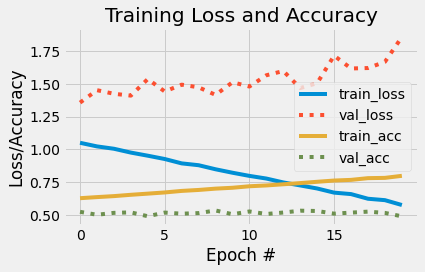

In [96]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 20), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 20), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Inspect using ```tensorboard```

This won't run on JupyterHub!

In [ ]:
%tensorboard --logdir logs/fit

## Classifier metrics

In [ ]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))